# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
#medical = pd.read_csv('data/insurance2.csv')
medical = pd.read_csv('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Frequentist Case Study/insurance2.csv')



In [20]:
medical.shape

(1338, 8)

In [22]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

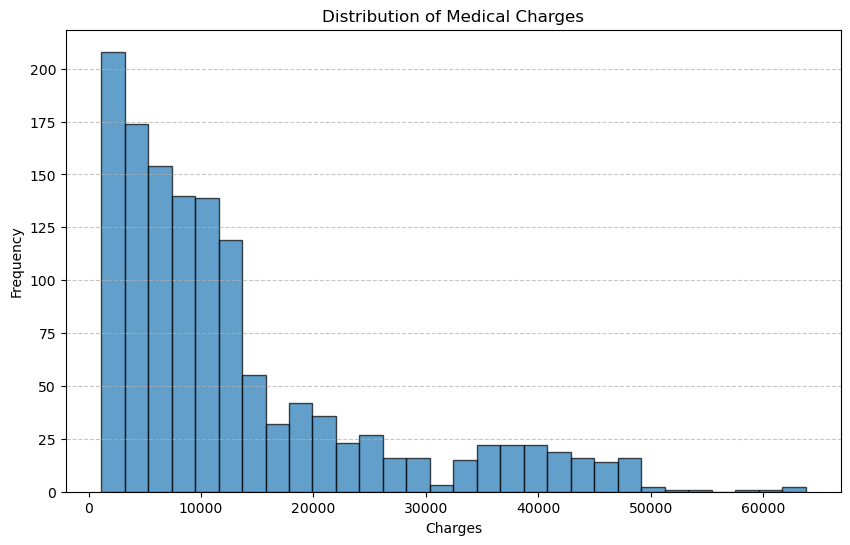

(13270.422265141257, 12110.011236693996)

In [24]:
# Plotting the histogram of charges
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculating mean and standard deviation
charges_mean = medical['charges'].mean()
charges_std = medical['charges'].std()

charges_mean, charges_std


In [ ]:

Skewness in Data:
The histogram is right-skewed (positively skewed), meaning most patients have lower charges, 
while a few patients have very high charges. This is common in real-world cost data.

Concentration of Charges:
The highest concentration of charges is in the lower range (e.g., 0 to ~15,000).
There are progressively fewer patients as charges increase, with very few having charges exceeding $40,000 or more.

Range of Data:
Charges range from very low (near $0) to over $60,000, indicating high variability in the dataset.

Outliers:
The long tail on the right suggests the presence of outliers—patients with extremely high charges.
    
Mean and Standard Deviation:
The mean ($13,270) is heavily influenced by the outliers, making it less representative of the typical charges in this dataset.
The large standard deviation ($12,110) reflects the wide variability in charges.
        



__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In [ ]:
Justification for Using These Data

Random Sampling:
The data are assumed to be a random sample of charges from the hospital, which satisfies the key requirement for statistical inference.
Random sampling ensures that the sample is representative of the hospital's population of charges, 
allowing us to generalize results to the broader dataset.

Central Limit Theorem (CLT):
The sample size (n=1338) is large, so according to the CLT, the sampling distribution of the sample mean will be approximately normal, 
regardless of the shape of the population distribution.This normality allows us to use parametric tests like the t-test 
to make inferences about the population mean.
    
Concern About the Average:
The administrator's concern is about the population mean of charges, which we can estimate and test using the
sample mean and standard deviation


Appropriate Frequentist Test:
The appropriate frequentist test to apply is the one-sample t-test because we are comparing the sample mean against 
a fixed threshold ($12,000).The population standard deviation is unknown (we estimate it using the sample standard deviation).
The test will help determine if the observed average is significantly different from $12,000.

    
Hypotheses for the Test

Null Hypothesis (𝐻0):
The actual average charge is $12,000 or higher
𝐻0:𝜇≥12,000

 
Alternative Hypothesis (𝐻𝑎):
The actual average charge is less than $12,000
𝐻𝑎:μ<12,000
    

In [27]:
from scipy.stats import t

# Given data
mu_0 = 12000  # Hypothesized population mean
n = 1338  # Sample size
sample_mean = 13270.42  # Sample mean (from earlier calculation)
sample_std = 12110.01  # Sample standard deviation (from earlier calculation)

# Calculate the t-statistic
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Calculate the p-value for a one-tailed t-test
p_value = t.cdf(t_statistic, df=n-1)  # Degrees of freedom = n - 1

t_statistic, p_value


(3.8373452696017134, 0.9999349124837151)

In [ ]:
Results:
T-Statistic: 3.84
P-Value: 0.9999 (approximately)


Comparison with Significance Level (α=0.05):
The p-value is much greater than the typical significance level of 0.05.
This means there is no evidence to reject the null hypothesis.

Conclusion:
The data does not support the concern that the average charge has fallen below $12,000.
In fact, the positive t-statistic suggests that the sample mean ($13,270.42) is significantly higher than
the hypothesized mean of $12,000.


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [29]:
# Calculate the critical value for a one-sided 95% confidence interval
alpha = 0.05  # Significance level
df = n - 1  # Degrees of freedom
critical_value = t.ppf(1 - alpha, df)  # One-sided critical value

# Calculate the margin of error
margin_of_error = critical_value * (sample_std / np.sqrt(n))

# Calculate the one-sided confidence interval (lower bound not relevant in this case)
confidence_interval_upper = sample_mean + margin_of_error

critical_value, confidence_interval_upper


(1.6459941145571317, 13815.35502567537)

In [ ]:
Results:
Critical Value (One-Sided 95% Confidence Interval): 1.65
Upper Bound of 95% Confidence Interval: $13,815.36

One-Sided Interval:
Since the administrator is specifically concerned about the average charge falling below $12,000, 
a one-sided confidence interval is appropriate. This focuses on the upper bound of the interval, 
which indicates how high the mean might reasonably be.

Conclusion:
The calculated upper bound ($13,815.36) is well above $12,000.
This suggests that even with 95% confidence, the average charge is unlikely to fall below $12,000. 
The administrator does not need to be concerned based on this analysis.



In [34]:
# Calculate the critical value for a two-sided 95% confidence interval
critical_value_two_sided = t.ppf(1 - alpha / 2, df)  # Two-sided critical value

# Calculate the margin of error for the two-sided interval
margin_of_error_two_sided = critical_value_two_sided * (sample_std / np.sqrt(n))

# Calculate the two-sided confidence interval
confidence_interval_lower = sample_mean - margin_of_error_two_sided
confidence_interval_upper = sample_mean + margin_of_error_two_sided

critical_value_two_sided, (confidence_interval_lower, confidence_interval_upper)


(1.961739888600845, (12620.951835376138, 13919.888164623862))

In [ ]:
Two-Sided Confidence Interval:
Critical Value (Two-Sided 95%): 1.96
95% Confidence Interval: ($12,620.95, $13,919.89)

Two-Sided Interval:
A two-sided confidence interval considers uncertainty in both directions (above and below the sample mean). 
This interval shows that the true population mean is expected to fall between $12,620.95 and $13,919.89 with 95% confidence.


Relevance to the Administrator's Concern:
The lower bound ($12,620.95) of this interval is above the critical threshold of $12,000.
This reinforces the conclusion that the administrator does not need to worry about the average charge falling below $12,000


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

In [ ]:
Hypotheses
For this analysis, we are testing whether there is a significant difference in the mean charges between insured and uninsured patients.

Null Hypothesis (𝐻0):
There is no difference in the mean charges for insured and uninsured patients:
𝐻0 : 𝜇insured = 𝜇uninsured

 
Alternative Hypothesis (𝐻𝑎):
There is a difference in the mean charges for insured and uninsured patients:
𝐻𝑎 : 𝜇insured ≠ 𝜇uninsured

 
Pooled Standard Deviation : The pooled standard deviation (𝑠𝑝) combines the standard deviations of the two groups.
Where:
   𝑛0,𝑛1: Sample sizes of insured and uninsured groups.
   𝑠0,𝑠1: Standard deviations of insured and uninsured groups.


T-Test Statistic
The t-test statistic for the difference between means is calculated as
Where:
𝑥ˉ0,𝑥ˉ1: Sample means of insured and uninsured groups.
𝑠𝑝: Pooled standard deviation.
𝑛0,𝑛1: Sample sizes of the two groups.



Assumption About Variances
We assume that the two groups have equal variances:
The variability in charges for insured and uninsured groups is assumed to be similar.
This assumption is critical for using the pooled standard deviation formula.
       

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import t



# Let's first check if the necessary columns exist
columns_needed = ['charges', 'insuranceclaim']

if set(columns_needed).issubset(medical.columns):
    
    # Split the data into two groups: insured and uninsured
    insured = medical[medical['insuranceclaim'] == 1]['charges']
    uninsured = medical[medical['insuranceclaim'] == 0]['charges']

    # Calculate sample statistics
    n1, n2 = len(insured), len(uninsured)
    mean1, mean2 = np.mean(insured), np.mean(uninsured)
    std1, std2 = np.std(insured, ddof=1), np.std(uninsured, ddof=1)

    # Calculate pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

    # Calculate the t-statistic
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

    # Degrees of freedom
    df = n1 + n2 - 2

    # Calculate the two-tailed p-value
    p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

    (t_statistic, p_value, pooled_std, mean1, mean2)
else:
    "Required columns ('charges', 'insuranceclaim') not found in the dataset."

# Display the calculated results for clarity
{
    "t_statistic": t_statistic,
    "p_value": p_value,
    "pooled_std": pooled_std,
    "mean_insured": mean1,
    "mean_uninsured": mean2
}

{'t_statistic': 11.893299030876715,
 'p_value': 0.0,
 'pooled_std': 11520.034268775256,
 'mean_insured': 16423.928276537677,
 'mean_uninsured': 8821.421892306305}

In [ ]:
Results:

T-Statistic: 11.89
P-Value: 0.0 (effectively)
Pooled Standard Deviation: $11,520.03
Mean Charges (Insured): $16,423.93
Mean Charges (Uninsured): $8,821.42


Statistical Significance:
The extremely small p-value (≈0.0) indicates that the difference in mean charges between insured and uninsured patients is 
highly significant.This provides strong evidence to reject the null hypothesis (𝐻0).

Conclusion:
There is a statistically significant difference in charges between insured and uninsured patients.
On average, insured patients are charged significantly more ($16,423.93) compared to uninsured patients ($8,821.42).
Assumption of Equal Variances:

The analysis assumes that the variances in charges for insured and uninsured patients are approximately equal. 



__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [60]:
# Manual calculation of t-statistic and p-value (already done above)
manual_results = {
    "t_statistic_manual": t_statistic,
    "p_value_manual": p_value
}

# Using scipy.stats for independent two-sample t-test
from scipy.stats import ttest_ind

# Perform the t-test with equal variance assumption (default for ttest_ind)
scipy_t_statistic, scipy_p_value = ttest_ind(insured, uninsured, equal_var=True)

# Combine results for comparison
{
    "manual_results": manual_results,
    "scipy_results": {
        "t_statistic_scipy": scipy_t_statistic,
        "p_value_scipy": scipy_p_value
    }
}


{'manual_results': {'t_statistic_manual': 11.893299030876715,
  'p_value_manual': 0.0},
 'scipy_results': {'t_statistic_scipy': 11.893299030876712,
  'p_value_scipy': 4.461230231620717e-31}}

In [ ]:
Results Comparison:
Manual Calculation:

T-Statistic: 11.89
P-Value: 0.0
Using scipy.stats.ttest_ind:

T-Statistic: 11.89
P-Value: 4.46×10 −31 (power -31)(effectively 0)

Matching Results:
Both the manual calculation and scipy.stats.ttest_ind yield the same t-statistic and p-value, 
confirming the correctness of the manual approach.

Conclusion:
The hypothesis test strongly rejects the null hypothesis, indicating a significant difference in mean charges 
between insured and uninsured patients.



Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

In [ ]:


In the scipy.stats library, there is no direct built-in function for a z-test equivalent to the ttest_ind function. 
This is because the t-test is much more commonly used in practice, especially for smaller sample sizes or 
when the population standard deviation is unknown.

Why is a Z-Test Not Directly Included?

Applicability of Z-Test:
A z-test requires the population standard deviation (𝜎) to be known, which is rare in most real-world scenarios. 
Without this information, the t-test is used instead, as it relies on the sample standard deviation (s).

Central Limit Theorem (CLT):
For large sample sizes (𝑛>30), the t-distribution approximates the normal distribution, and 
the t-test can be used in place of the z-test without any meaningful difference.

Focus on Flexibility:
The t-test is versatile and works for both small and large sample sizes, making it more broadly applicable than the z-test.

Conclusion:
The absence of a dedicated z-test function in scipy.stats reflects its limited practical use compared to the t-test. However, 
a z-test can still be performed manually when the population standard deviation is known and the sample size is large.

                                                                       

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test